In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("Crude Oil WTI Futures 85-04.csv",index_col='Date',parse_dates=True)

In [10]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-12-13,41.01,40.90,41.65,40.25,95.85K,0.74%
2004-12-10,40.71,42.50,43.29,40.25,118.14K,-4.28%
2004-12-09,42.53,42.05,43.20,41.95,99.43K,1.41%
2004-12-08,41.94,41.41,42.50,40.45,127.25K,1.16%
2004-12-07,41.46,43.10,43.19,41.38,109.07K,-3.54%


In [11]:
df.shape

(5000, 6)

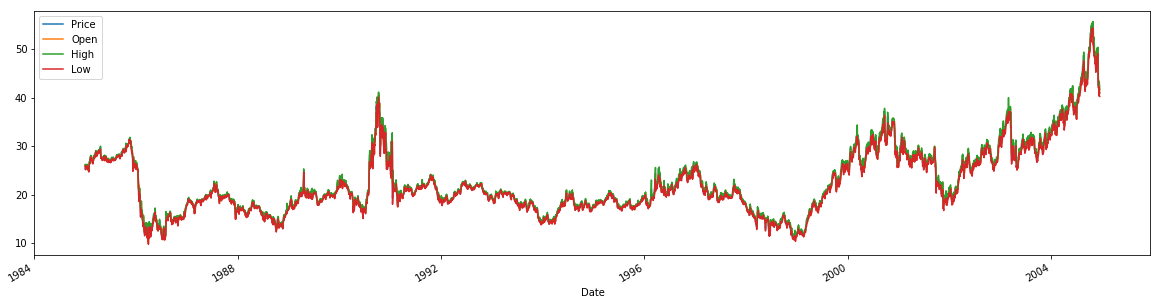

In [17]:
df.plot(figsize=(20,5));

In [13]:
#def str_to_num(volume) :
#    floatnum = float(volume[:-1])
#    return floatnum *1000
#df['Volume'] = df['Vol.'].apply(str_to_num)

In [14]:
pdf = df.drop(['Open','High','Low'],axis=1)

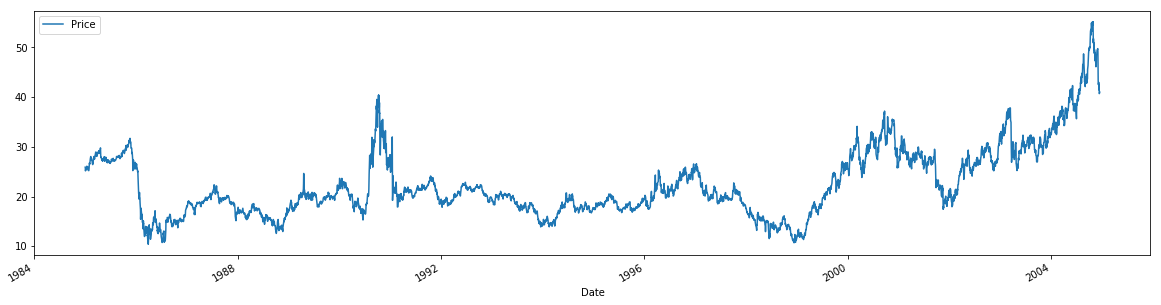

In [16]:
pdf.plot(figsize=(20,5));

In [20]:
from sklearn.linear_model import LinearRegression

In [23]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(pdf.index).reshape((-1,1)), pdf['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],trend_model.intercept_))

Trend model coefficient=1.8700915017790193e-17 and intercept=7.679914121547595


(array([724276., 725737., 727198., 728659., 730120., 731581., 733042.]),
 <a list of 7 Text xticklabel objects>)

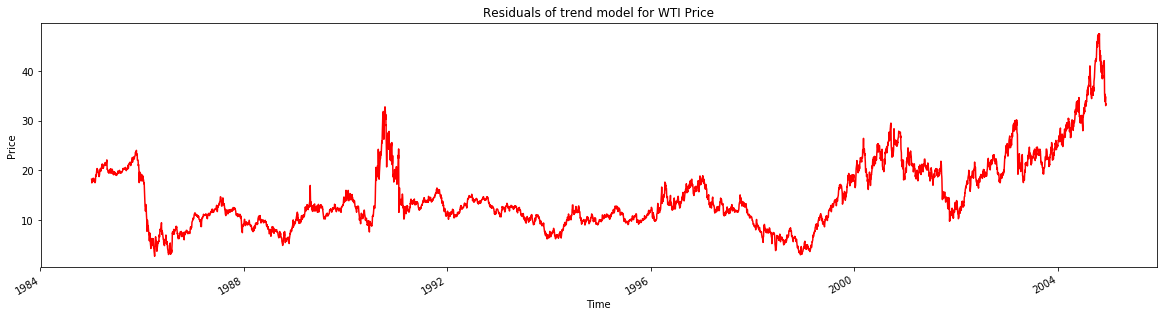

In [40]:
residuals = np.array(pdf['Price'])-trend_model.predict(np.array(range(1,5001)).reshape((-1,1)))

plt.figure(figsize=(20,5))
pd.Series(data=residuals,index=pdf.index).plot(color='r')
plt.title('Residuals of trend model for WTI Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=30)

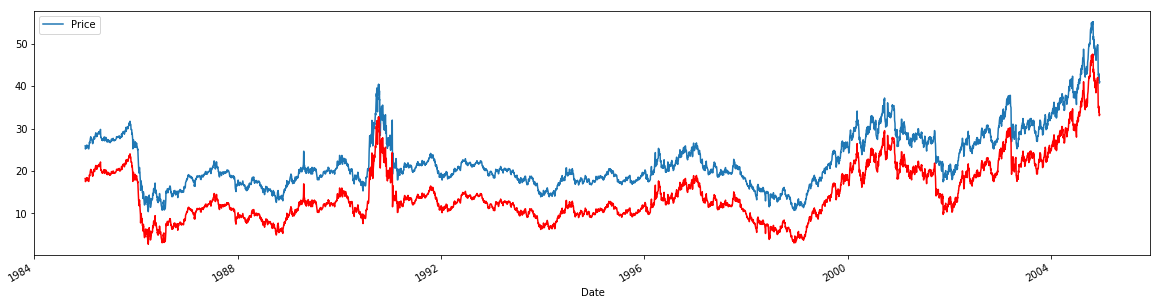

In [56]:
pdf.plot(figsize=(20,5))
pd.Series(data=residuals,index=pdf.index).plot(color='r',label='Residual of trend')